# Analysis 

- The number of urban driver is more than rural or suburban.
- The average price per ride for rural area is more than urban or suburban 
- The rides per city is more in urban than rural or suburban


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#file import and merge two file
city_data=pd.DataFrame(pd.read_csv("raw_data/city_data.csv"))
city_data=city_data.drop_duplicates("city")
ride_data=pd.DataFrame(pd.read_csv("raw_data/ride_data.csv"))
city_ride=pd.merge(city_data,ride_data,on="city")
city_ride=city_ride.fillna(0)

# file
file_urban=city_ride.loc[(city_ride["type"]=="Urban")]
file_suburban=city_ride.loc[(city_ride["type"]=="Suburban")]
file_rural=city_ride.loc[(city_ride["type"]=="Rural")]

Total=city_ride["fare"].sum()
Rides=city_ride["ride_id"].count()
Drivers=city_ride["driver_count"].sum()

In [3]:
#Average Fare ($) Per City

avg_fare_urban=file_urban.groupby(["city"])["fare"].mean()
avg_fare_suburban=file_suburban.groupby(["city"])["fare"].mean()
avg_fare_rural=file_rural.groupby(["city"])["fare"].mean()

#Total Number of Rides Per City

rides_urban=file_urban.groupby(["city"])["ride_id"].count()
rides_suburban=file_suburban.groupby(["city"])["ride_id"].count()
rides_rural=file_rural.groupby(["city"])["ride_id"].count()

#Total count of driver

driver_urban=file_urban.groupby(["city"])["driver_count"].sum()
driver_suburban=file_suburban.groupby(["city"])["driver_count"].sum()
driver_rural=file_rural.groupby(["city"])["driver_count"].sum()

In [4]:
urban=plt.scatter(rides_urban, avg_fare_urban, marker="o",facecolors="Gold", edgecolors="black",s=driver_urban/2, alpha=0.5,label="Urban")
suburban=plt.scatter(rides_suburban, avg_fare_suburban, marker="o",facecolors="LightSkyBlue", edgecolors="Blue",s=driver_suburban/2, alpha=0.75,label="Suburban")
rural=plt.scatter(rides_rural, avg_fare_rural, marker="o",facecolors="LightCoral", edgecolors="Red",s=driver_rural/2, alpha=1,label="Rural")

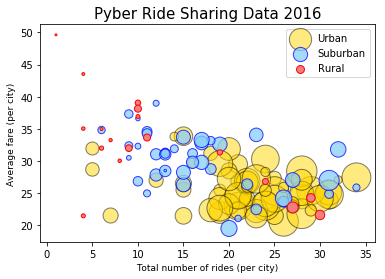

In [5]:

#adding the text to axis and overall title
plt.title('Pyber Ride Sharing Data 2016', fontsize=15)
plt.xlabel('Total number of rides (per city)', fontsize=9)
plt.ylabel('Average fare (per city)', fontsize=9)
plt.legend(handles=[urban,suburban,rural], loc="best")
#show the plot

plt.show()


## PIE CHARTS 


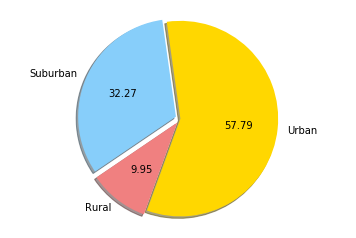

In [6]:
# % of Total Fares by City Type

Total_Urban=(file_urban["fare"].sum())/Total
Total_suburban=(file_suburban["fare"].sum())/Total
Total_rural=(file_rural["fare"].sum())/Total

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [Total_Urban, Total_suburban, Total_rural]

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyblue", "lightcoral"]

explode=(0, 0.05, 0.05)

plt.pie(sizes,  labels=labels, colors=colors,autopct="%.2f", shadow=True, startangle=250,explode=explode)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()


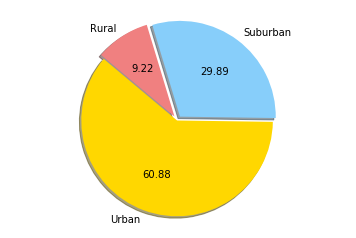

In [7]:
#% of Total Rides by City Type

Rides_Urban=(file_urban["ride_id"].count())/Rides
Rides_suburban=(file_suburban["ride_id"].count())/Rides
Rides_rural=(file_rural["ride_id"].count())/Rides

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [Rides_Urban, Rides_suburban, Rides_rural]

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyblue", "lightcoral"]

plt.pie(sizes,  labels=labels, colors=colors,autopct="%.2f", shadow=True, startangle=140,explode=explode)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

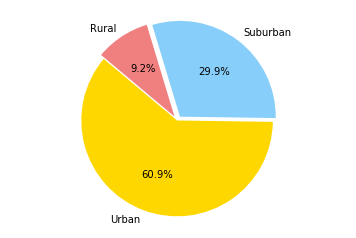

In [8]:
#% of Total Drivers by City Type

driver_Urban=(file_urban["driver_count"].count())/Rides
driver_suburban=(file_suburban["driver_count"].count())/Rides
driver_rural=(file_rural["driver_count"].count())/Rides

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [driver_Urban, driver_suburban, driver_rural]

# The colors of each section of the pie chart
colors = ["Gold", "LightSkyblue", "lightcoral"]

plt.pie(sizes,  labels=labels, colors=colors,autopct="%.1f%%", shadow=False, startangle=140,explode=explode)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()
